# Gradients and Color Spaces

## 1. Gradient Threshold

### a) Sobel Operator

The Sobel operator is at the heart of the Canny edge detection algorithm you used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the **x** or **y** direction. The operators for **Sobel_x** and **Sobel_y**, respectively, look like this: 

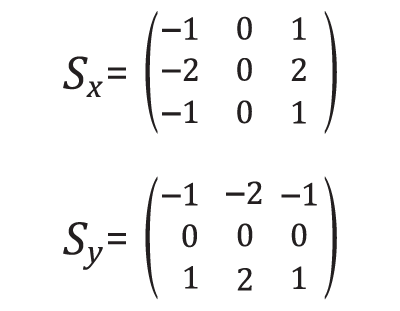

These are examples of Sobel operators with a kernel size of 3 (implying a 3 x 3 operator in each case). This is the minimum size, but the kernel size can be any odd number. A larger kernel implies taking the gradient over a larger region of the image, or, in other words, a smoother gradient.

To understand how these operators take the derivative, you can think of overlaying either one on a 3 x 3 region of an image. If the image is flat across that region (i.e., there is little change in values across the given region), then the result (summing the element-wise product of the operator and corresponding image pixels) will be zero.

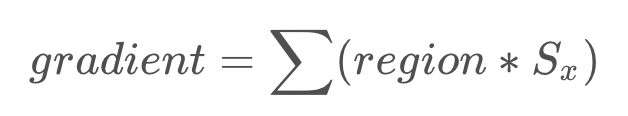

For example, given: 

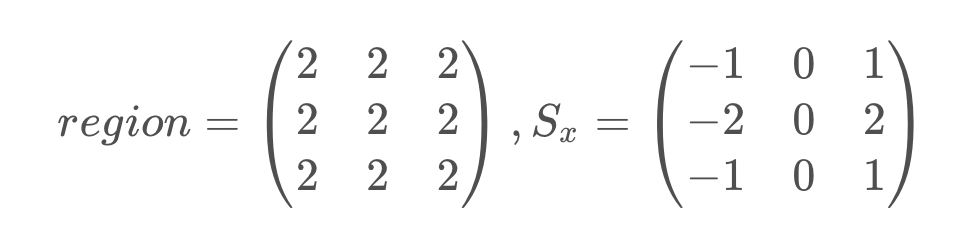

The element-wise product would be: 

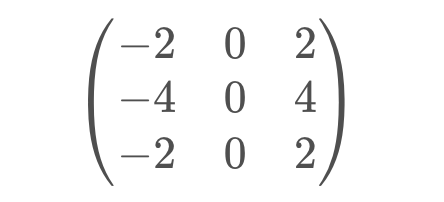 

In which case, the sum of this matrix is **0**, implying a flat gradient (in the x-direction in this calculation, although the y-direction is also zero in this example).

If, instead, for example, you apply the **S_x** operator to a region of the image where values are rising from left to right, then the result will be positive, implying a positive derivative. 

Given: 

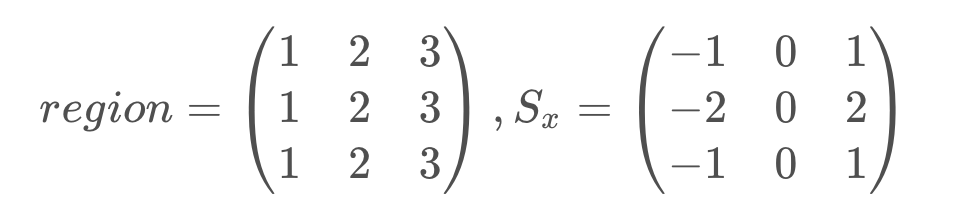 

The element-wise product would be:

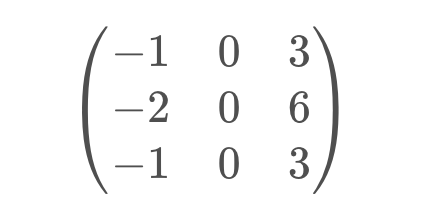

This time, the sum of this matrix is **8**, meaning a gradient exists in the x-direction. Note that in this example image region, if you applied the **S_y** operator, the result would be a gradient of **0** in the y-direction, as the values are not varying from top to bottom. 

#### Visual Example
If we apply the Sobel xx and yy operators to this image: 

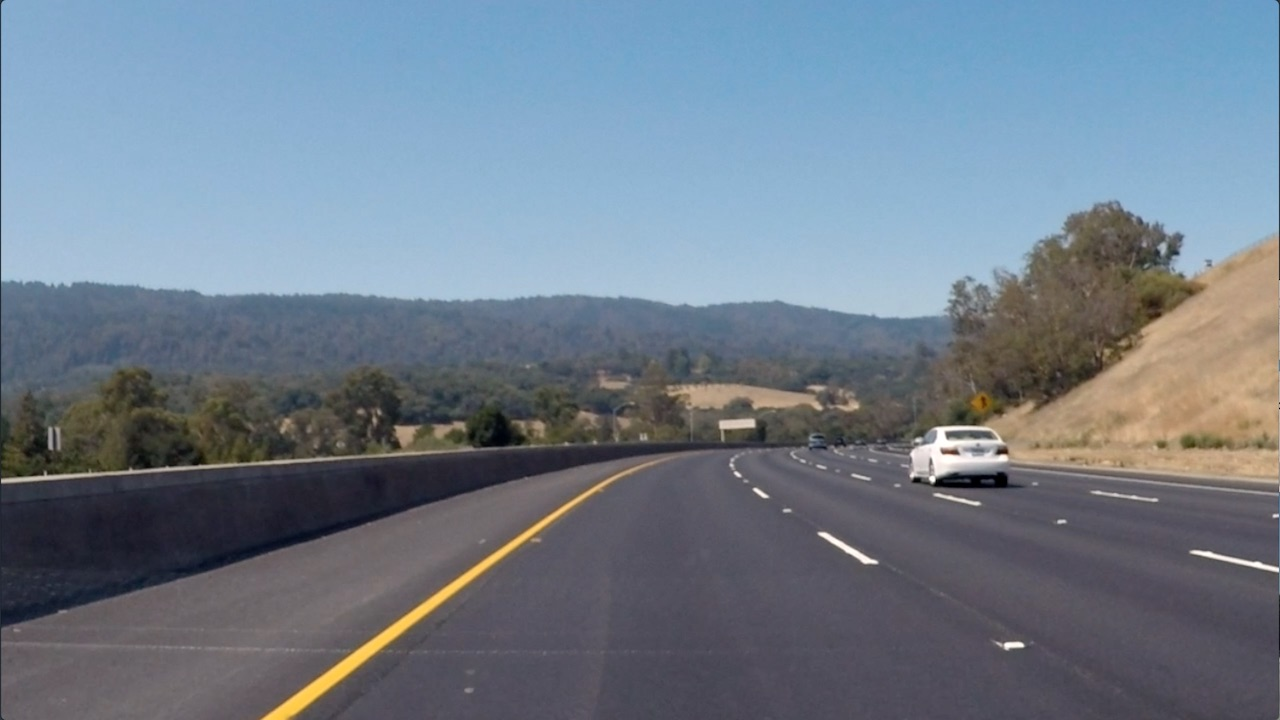 

And then we take the absolute value, we get the result: 

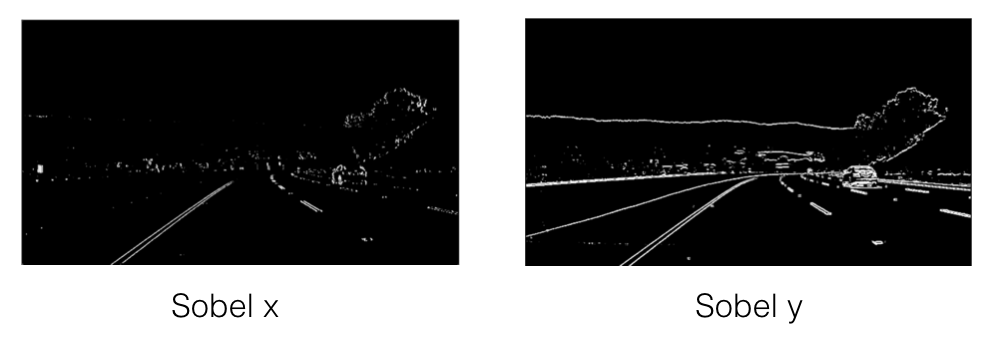

#### x vs. y

In the above images, you can see that the gradients taken in both the xx and the yy directions detect the lane lines and pick up other edges. Taking the gradient in the xx direction emphasizes edges closer to vertical. Alternatively, taking the gradient in the yy direction emphasizes edges closer to horizontal.

In the upcoming exercises, you'll write functions to take various thresholds of the xx and yy gradients. Here's some code that might be useful: 

**Examples of Useful Code** 

You need to pass a single color channel to the `cv2.Sobel()` function, so first convert it to grayscale:

`gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)` 

Note: Make sure you use the correct grayscale conversion depending on how you've read in your images. Use `cv2.COLOR_RGB2GRAY` if you've read in an image using `mpimg.imread()`. Use `cv2.COLOR_BGR2GRAY` if you've read in an image using `cv2.imread()`. 

Calculate the derivative in the xx direction (the 1, 0 at the end denotes xx direction): 

`sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)` 

Calculate the derivative in the y direction (the 0, 1 at the end denotes y direction): 

`sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)`

Calculate the absolute value of the x derivative:

`abs_sobelx = np.absolute(sobelx)`

Convert the absolute value image to 8-bit:

`scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))`

Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png. You could just as well choose a different standard range of values, like 0 to 1 etc. 

Create a binary threshold to select pixels based on gradient strength:

```

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

```


**Result**

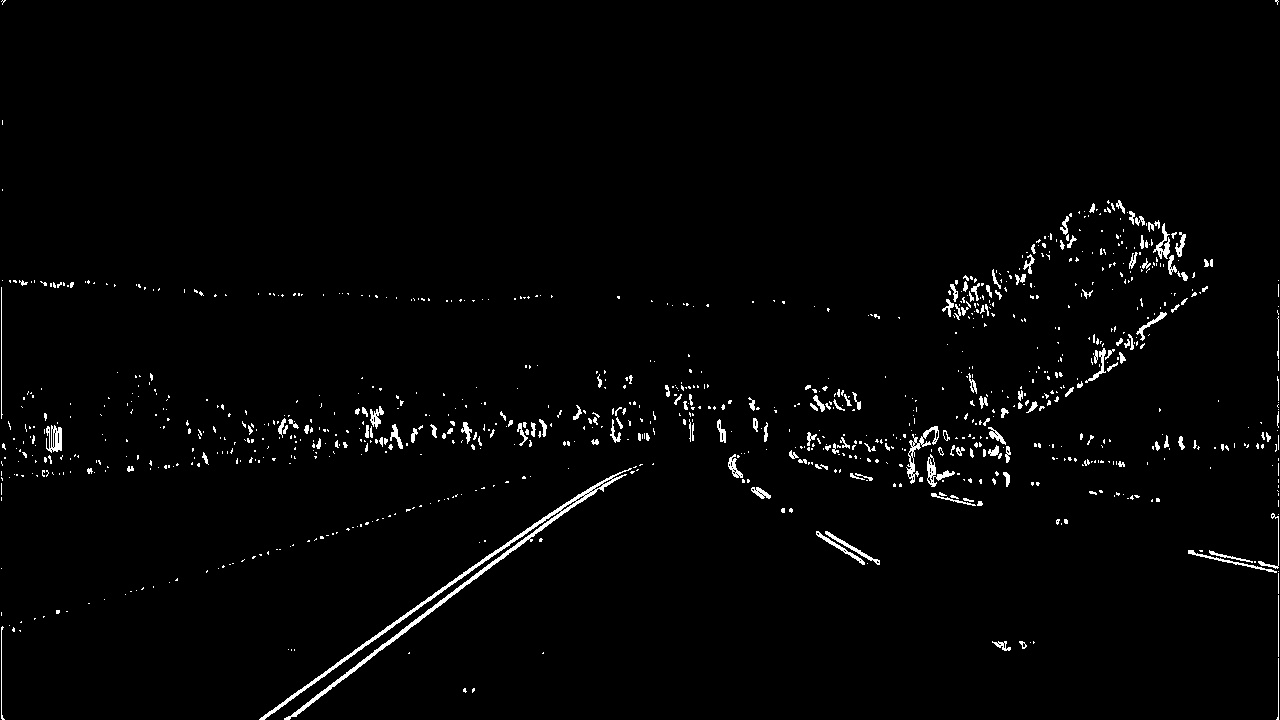


#### Applying Sobel

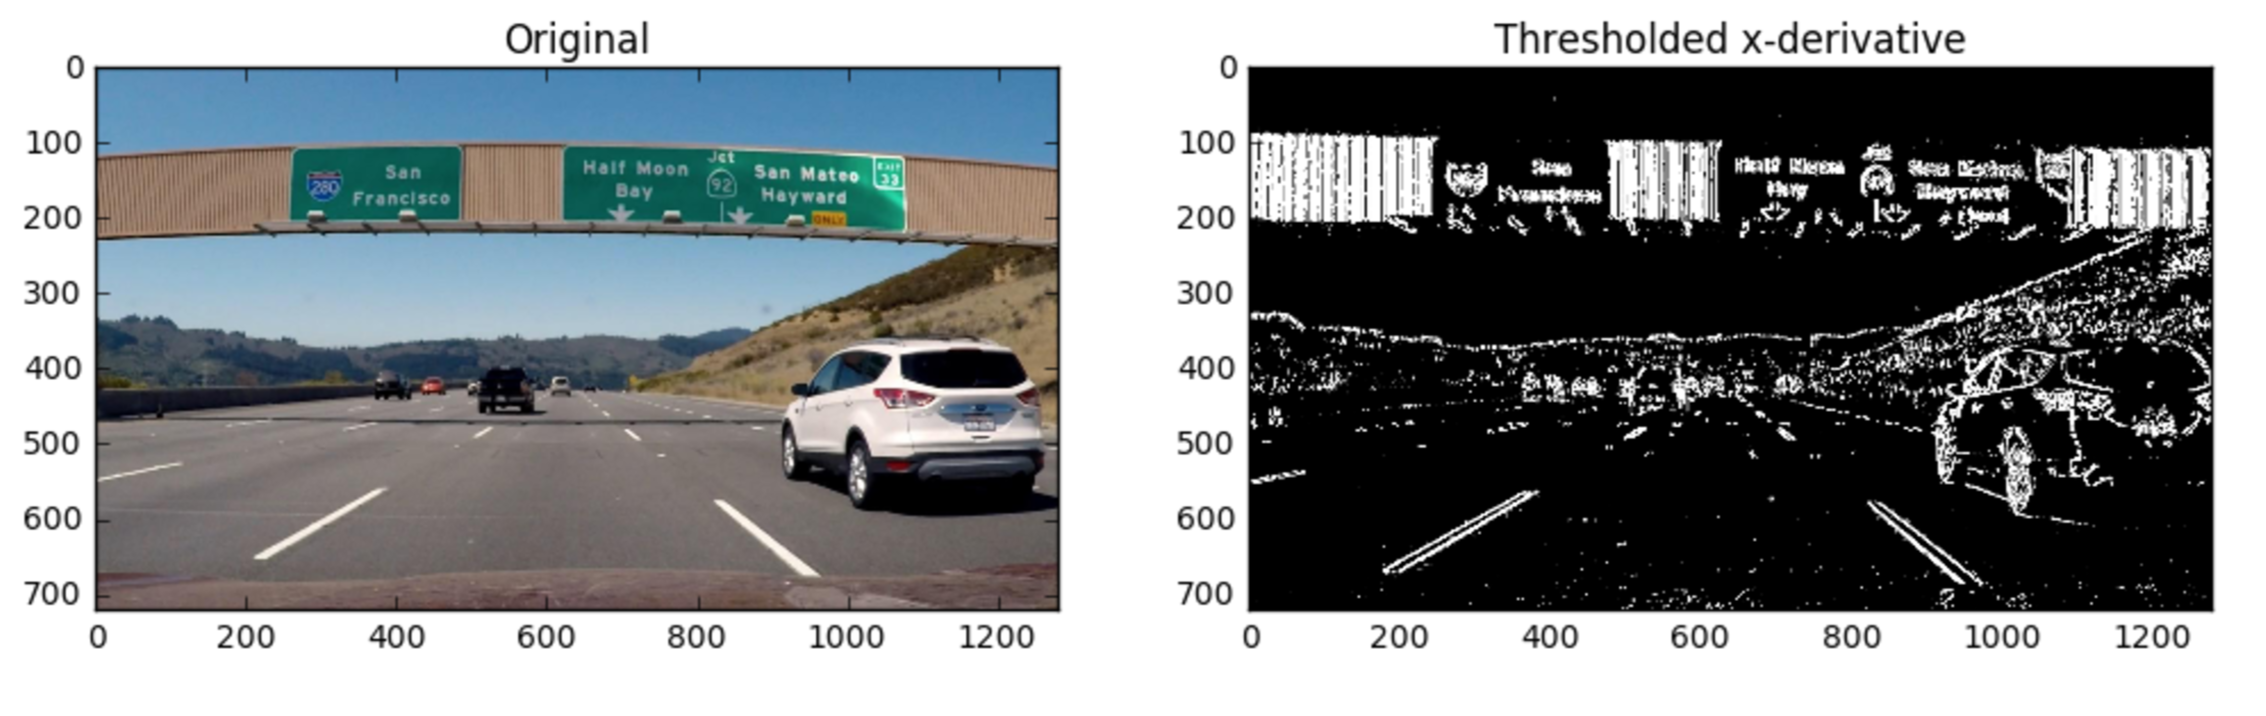 

Here's the scaffolding for your function: 

```

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    # Apply cv2.Sobel()
    # Take the absolute value of the output from cv2.Sobel()
    # Scale the result to an 8-bit range (0-255)
    # Apply lower and upper thresholds
    # Create binary_output
    return binary_output

```

Pass in `img` and set the parameter `orient` as `'x'` or `'y'` to take either the x or y gradient. Set `min_thresh`, and `max_thresh` to specify the range to select for `binary output`. You can use exclusive (`<, >`) or inclusive (`<=, >=`) thresholding.

NOTE: Your output should be an array of the same size as the input image. The output array elements should be `1` where gradients were in the threshold range, and `0` everywhere else.

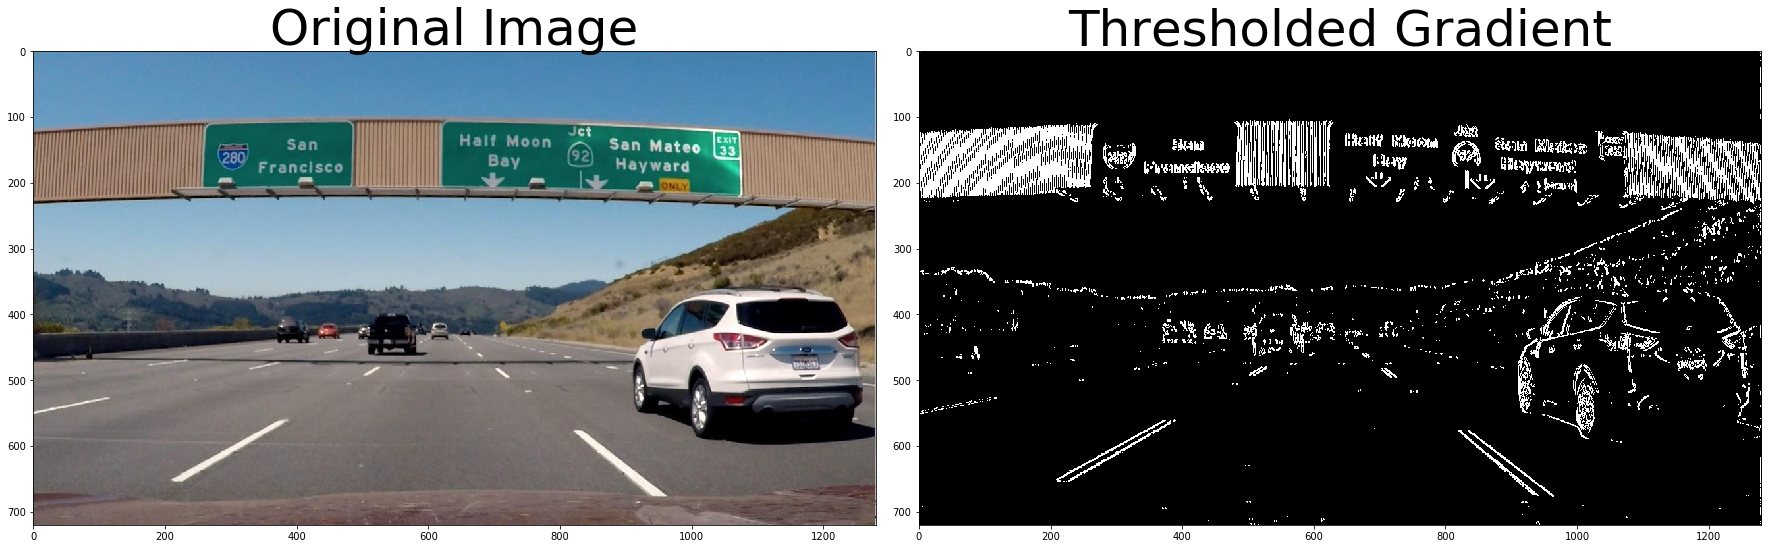

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### b) Magnitude of the Gradient

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the **x and y** directions, the magnitude is the square root of the sum of the squares.

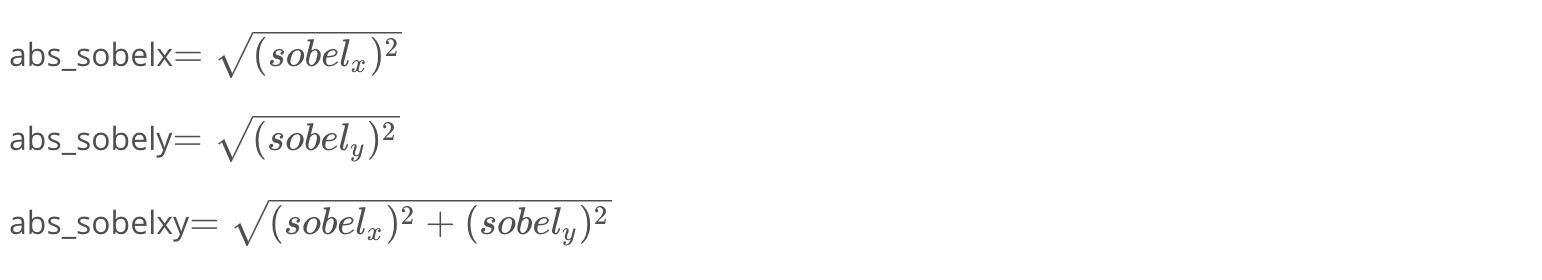

It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter.

It's important to note here that the kernel size should be an **odd** number. Since we are searching for the gradient around a given pixel, we want to have an equal number of pixels in each direction of the region from this central pixel, leading to an odd-numbered filter size - a filter of size three has the central pixel with one additional pixel in each direction, while a filter of size five has an additional two pixels outward from the central pixel in each direction.

The function you'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met. 

Steps to take in this exercise:
1. Fill out the function in the editor below to return a thresholded gradient magnitude. Again, you can apply exclusive (`<, >`) or inclusive (`<=, >=`) thresholds.
2. Test that your function returns output similar to the example below for `sobel_kernel=9, mag_thresh=(30, 100)`.

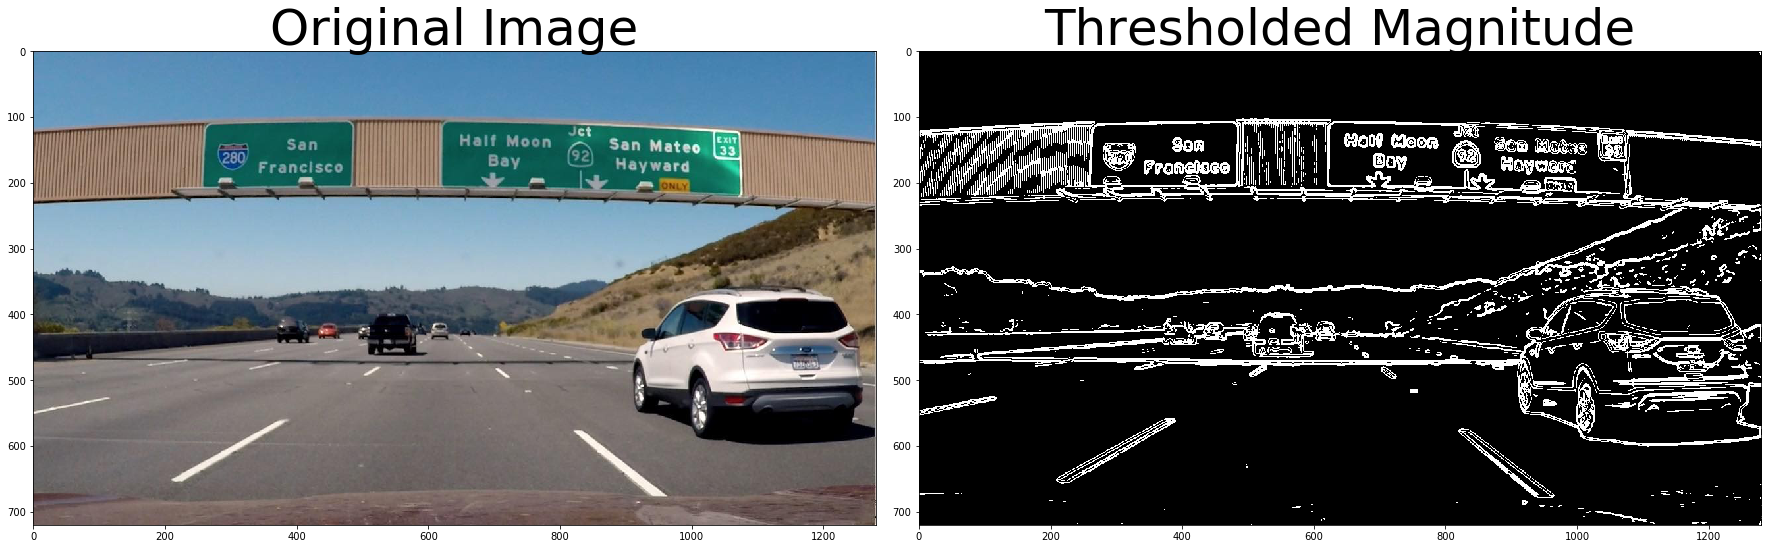

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### c) Direction of the Gradient

The direction of the gradient is simply the inverse tangent (arctangent) of the yy gradient divided by the xx gradient:

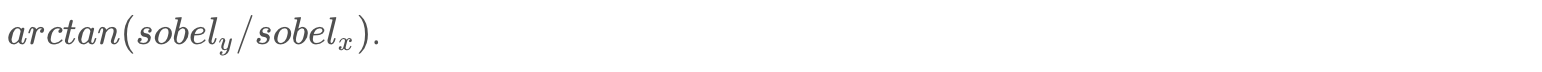

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of −π/2 to π/2. An orientation of 0 implies a vertical line and orientations of +/−π/2 imply horizontal lines. (Note that in the quiz below, we actually utilize `np.arctan2`, which can return values between +/−π; however, as we'll take the absolute value of sobel_x, this restricts the values to +/−π/2, as shown here.)

In this next exercise, you'll write a function to compute the direction of the gradient and apply a threshold. The direction of the gradient is much noisier than the gradient magnitude, but you should find that you can pick out particular features by orientation.

Steps to take in this exercise:
1. Fill out the function in the editor below to return a thresholded absolute value of the gradient direction. Use Boolean operators, again with exclusive (`<, >`) or inclusive (`<=, >=`) thresholds.
2. Test that your function returns output similar to the example below for `sobel_kernel=15, thresh=(0.7, 1.3)`. 

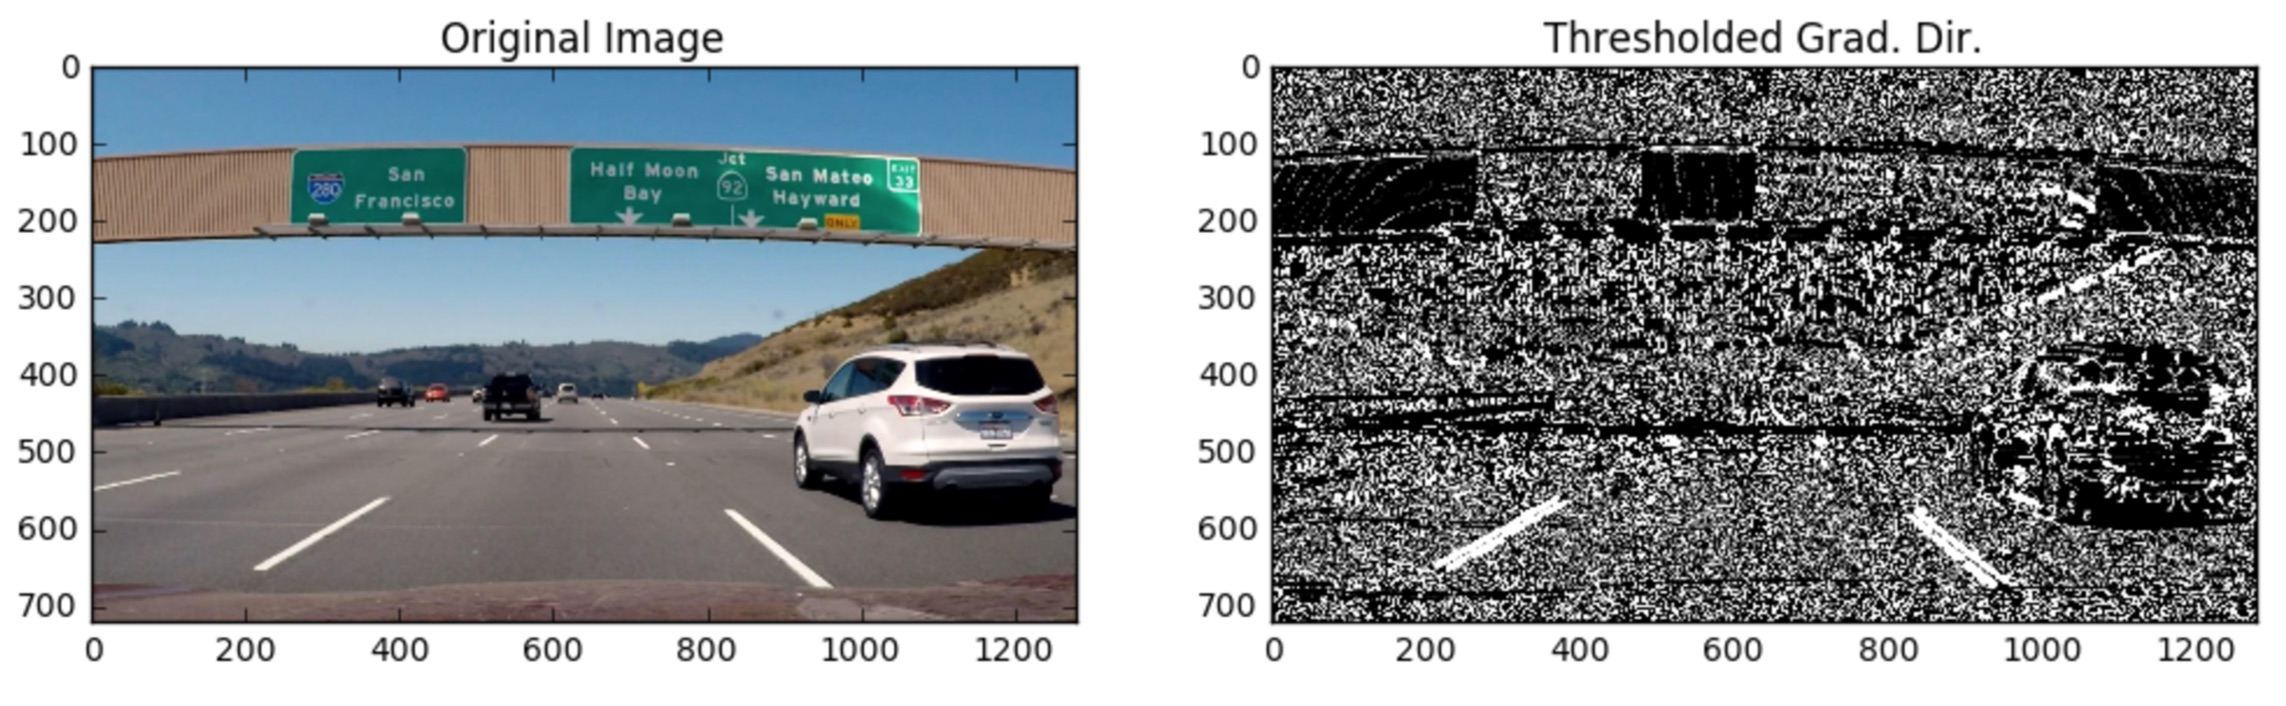

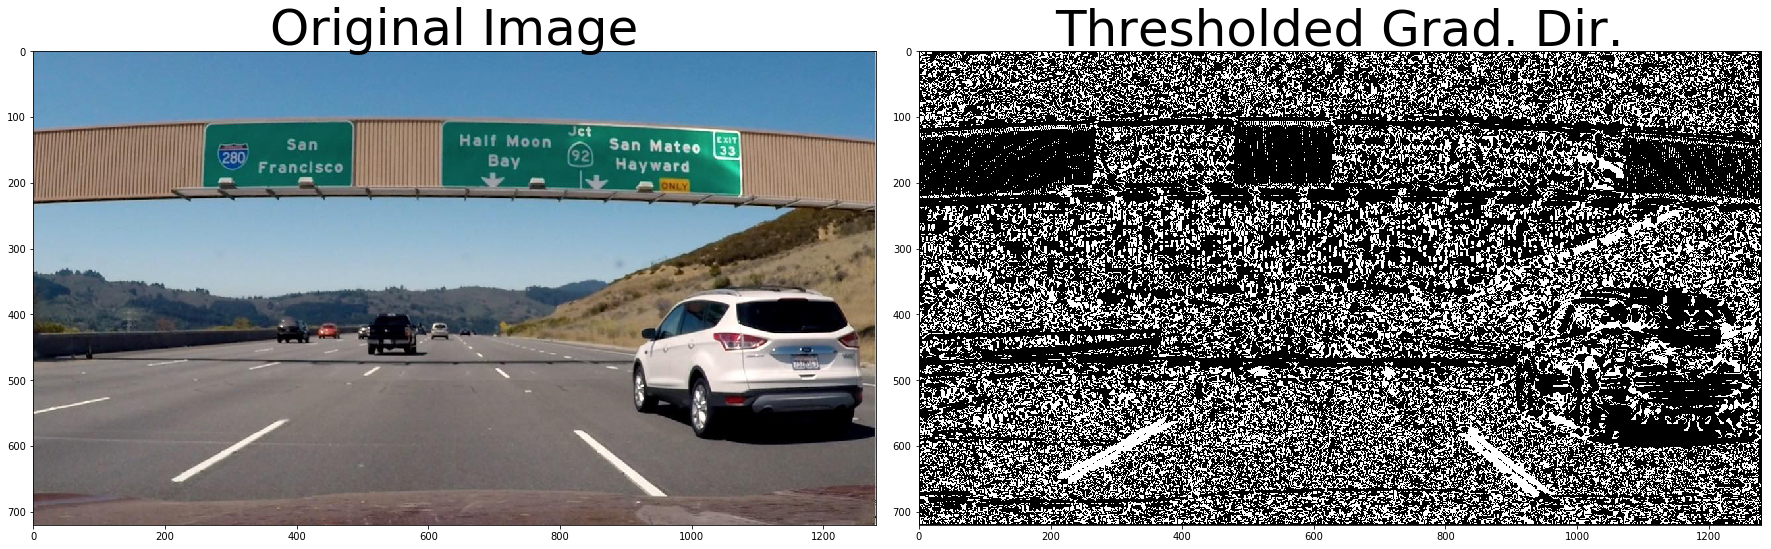

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### d) Combining Thresholds

If you play around with the thresholds in the last exercise, you'll find that you can start to identify the lane lines by gradient direction alone by setting the threshold around `thresh = (0.7, 1.3)`, but there's still a lot of noise in the resulting image.

Now consider how you can use various aspects of your gradient measurements (x, y, magnitude, direction) to isolate lane-line pixels. Specifically, think about how you can use thresholds of the x and y gradients, the overall gradient magnitude, and the gradient direction to focus on pixels that are likely to be part of the lane lines.

#### Challenge: 

In the project at the end of this section, you'll want to experiment with thresholding various aspects of the gradient, so now would be a great time to start coding it up on your local machine! Grab the image we've been working with for the last three quizzes [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.png) (or a smaller jpg file [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.jpg)).

Combine the selection thresholds from the last 3 quizzes to write a piece of code like the following, where you can play with various thresholds and see the output.

```

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))

```


Try different combinations and see what you get.

For example, here is a selection for pixels where both the xx and yy gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.


```

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

```

#### Output

Here is an example of a binary result from multiple thresholds:

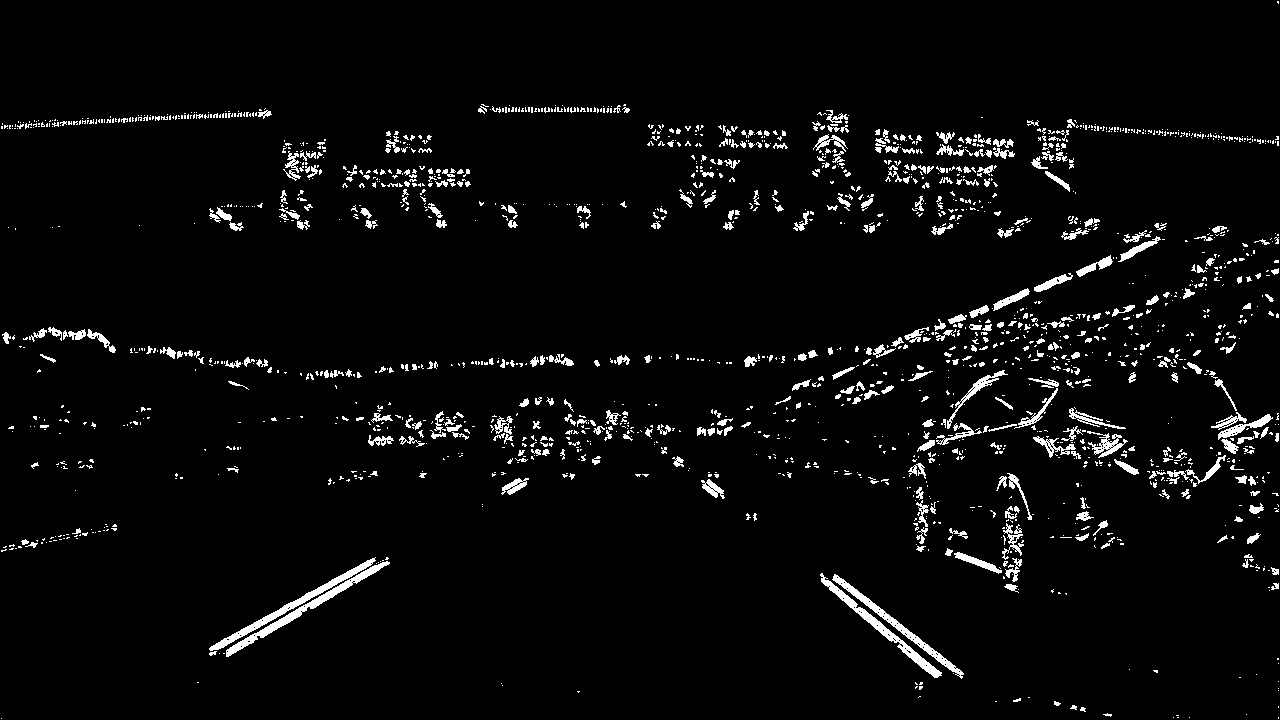

In [ ]:
# Reserved for Challenge

## 2. Color Spaces

### a) Color Thresholding

A **color space** is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

**RGB** is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

**Note:** If you read in an image using `matplotlib.image.imread()` you will get an RGB image, but if you read it in using OpenCV `cv2.imread()` this will give you a BGR image.

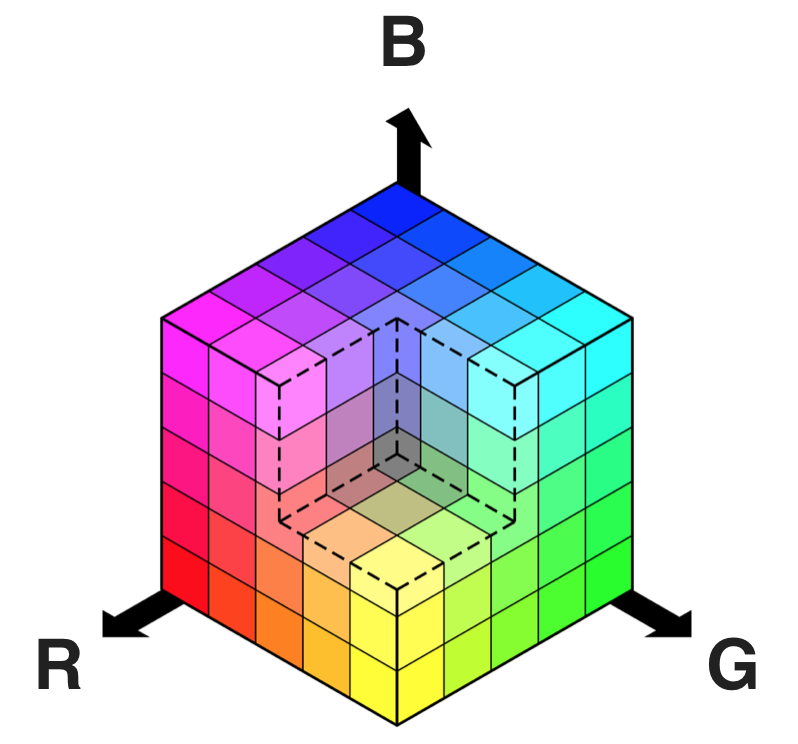

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.

There is also **HSV** color space (**hue**, **saturation**, and **value**), and **HLS** space (**hue**, **lightness**, and **saturation**). These are some of the most commonly used color spaces in image analysis.

To get some intuition about these color spaces, you can generally think of **Hue** as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, **Lightness** and **Value** represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. **Saturation** also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the history and the derivation of HLS and HSV color spaces [here](https://en.wikipedia.org/wiki/HSL_and_HSV). 

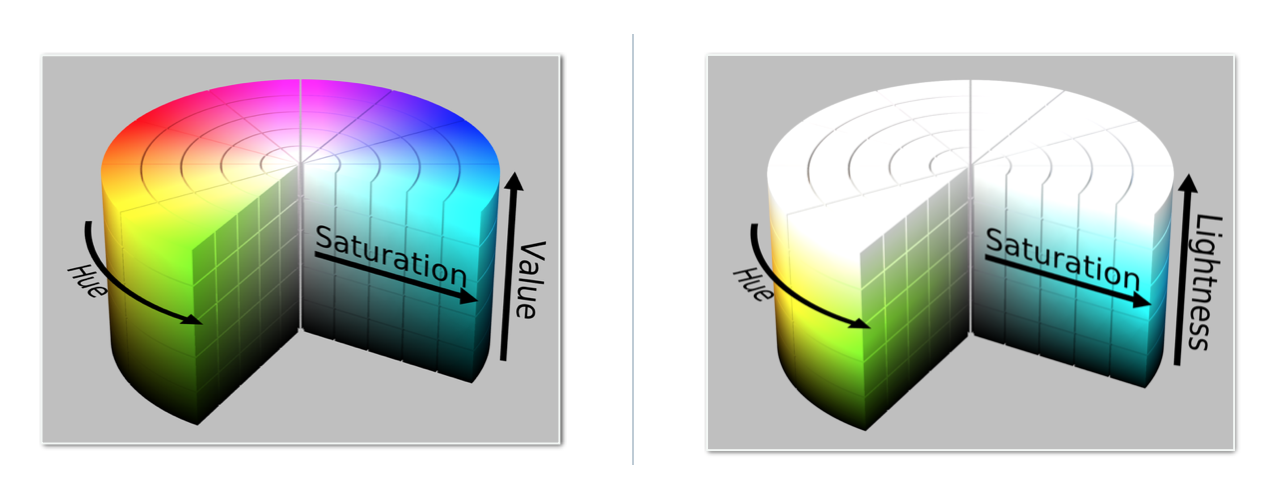

In the code example, I used HLS space to help detect lane lines of different colors and under different lighting conditions.

OpenCV provides a function `hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)` that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that all this math is for converting 8-bit images, which is the format for most road images in this course. These equations convert one color at a time from RGB to HLS.

#### Constants

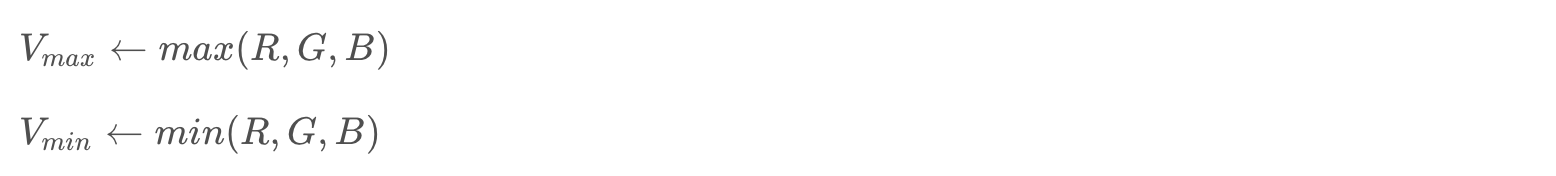

These are the maximum and minimum values across all three RGB values for a given color (by pixel).

Note that in these equations, it would be necessary to divide the RGB values by 255 such that they fall in the range (0, 1)(0,1), but OpenCV will perform this for you in `cv2.cvtColor()`. **L** and **S** are scaled back up after the transformations take place, while **H** is halved for use in 8-bit images (see below).

#### H channel conversion equations

There are three different equations, which one is used depends on the the value of Vmax whether that's R, G, or B.

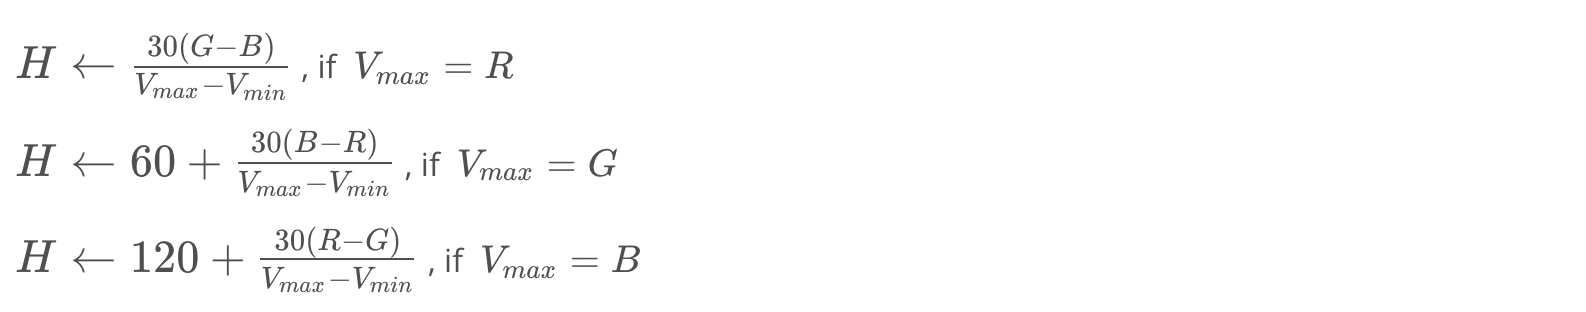

**Note:** In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

#### L channel conversion equation

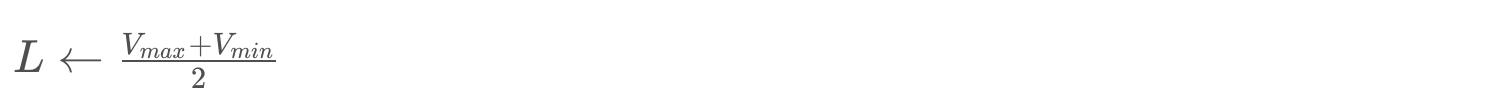

#### S channel conversion equations

There are two possible equations; one is used depending on the value of L.

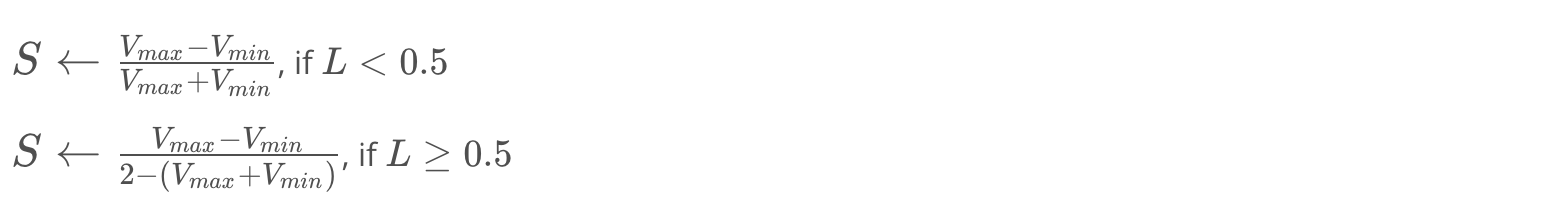


### b) HLS and Color Thresholds

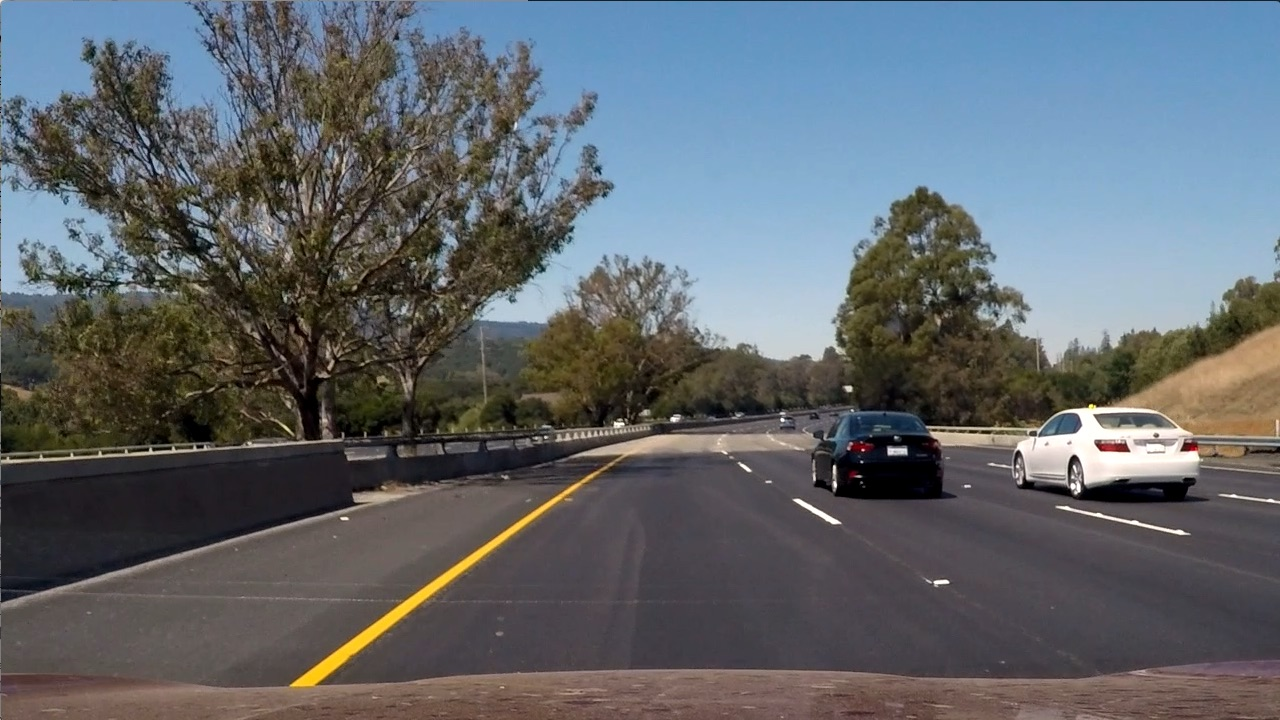

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:

```

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

```

And here's the result:

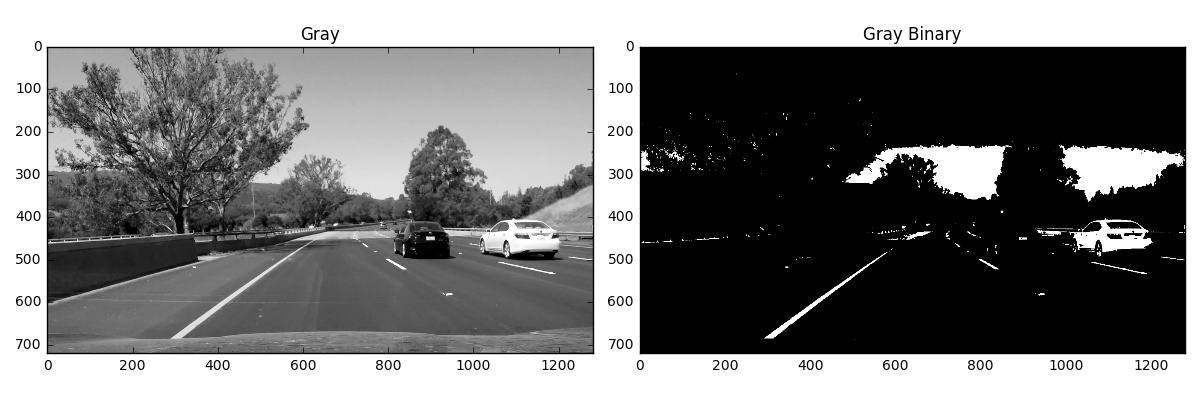

You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:

```

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

```

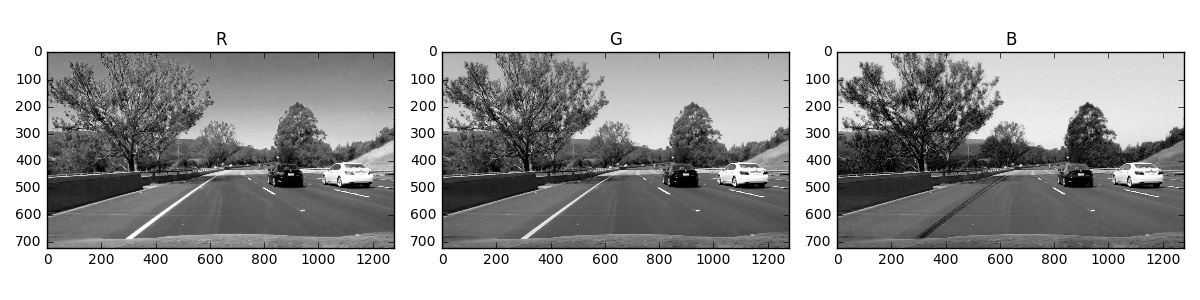

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:

```

thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

```

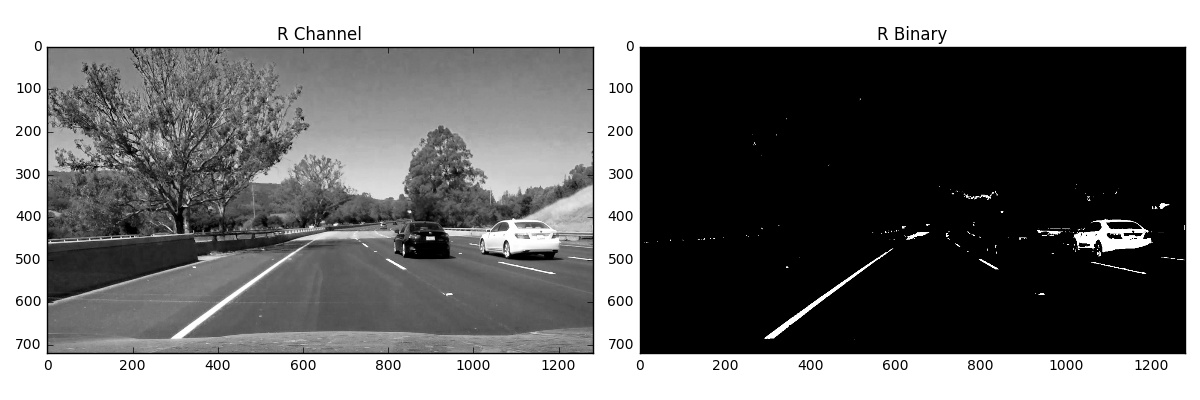

In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

```

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

```

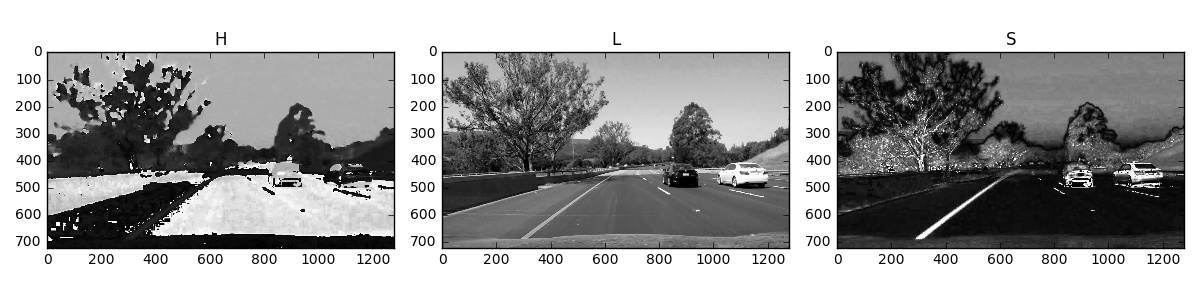

The S channel picks up the lines well, so let's try applying a threshold there: 

```

thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

```

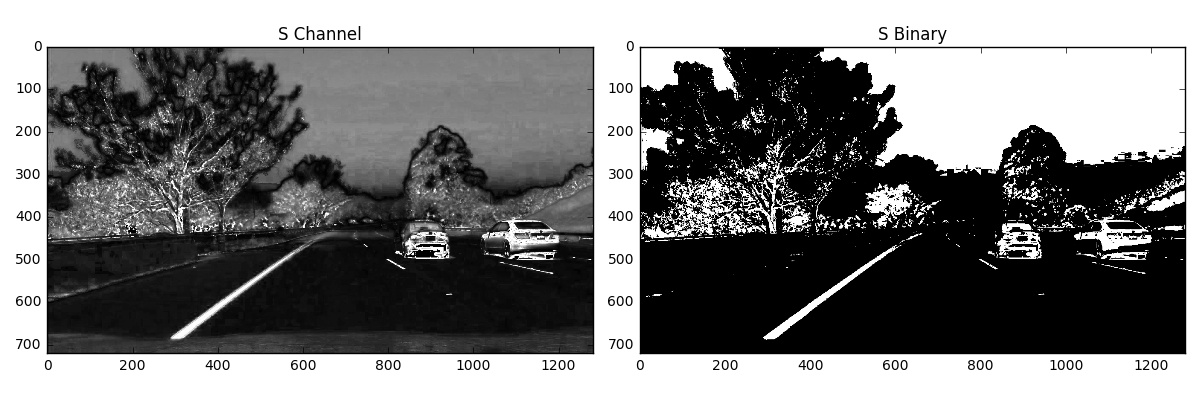

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

```

thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

```

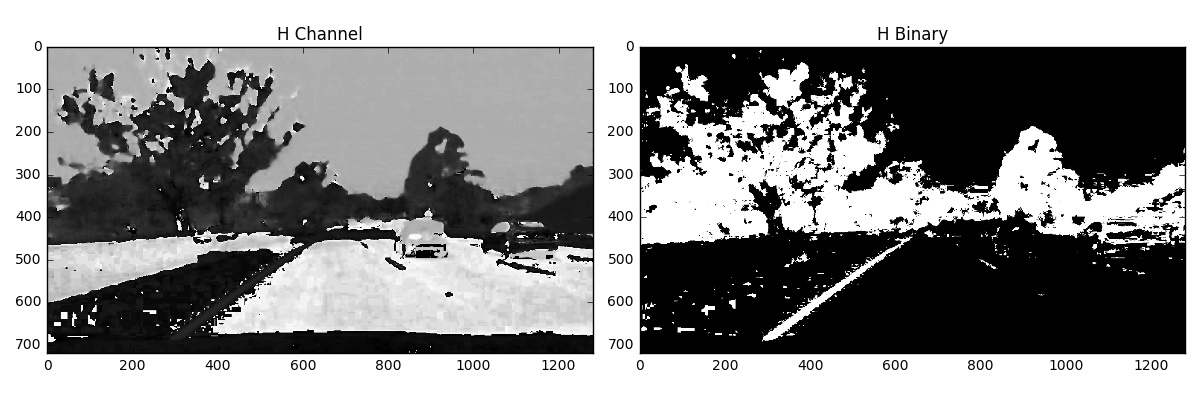

From these examples, you can see that the S channel is probably your best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image:

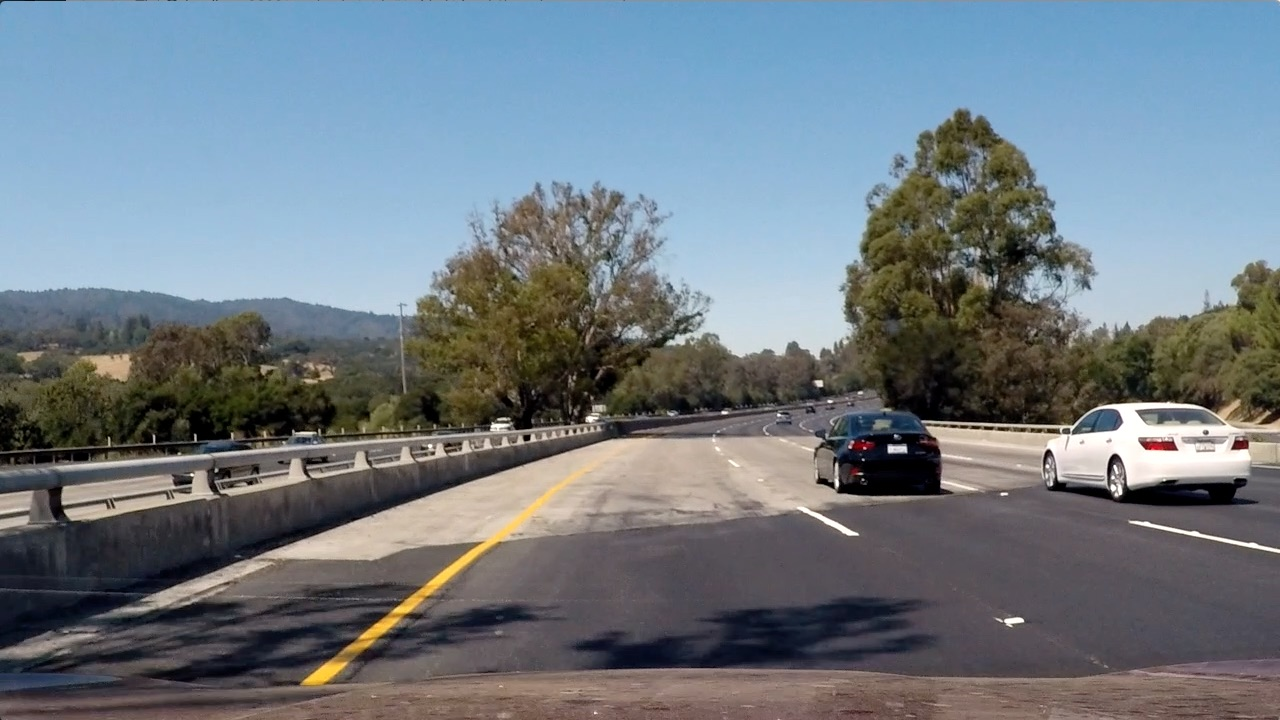

Here's how the various channels and binaries (with the same threshold values as above) look:

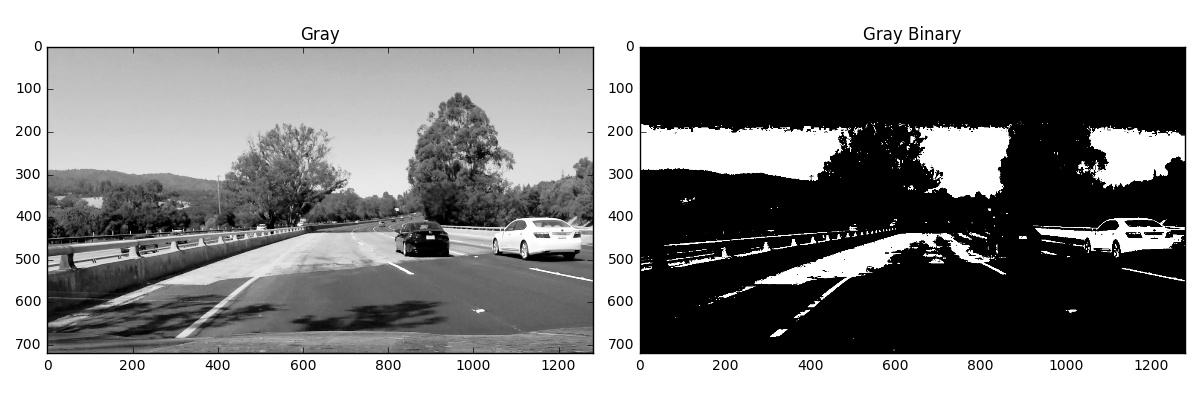

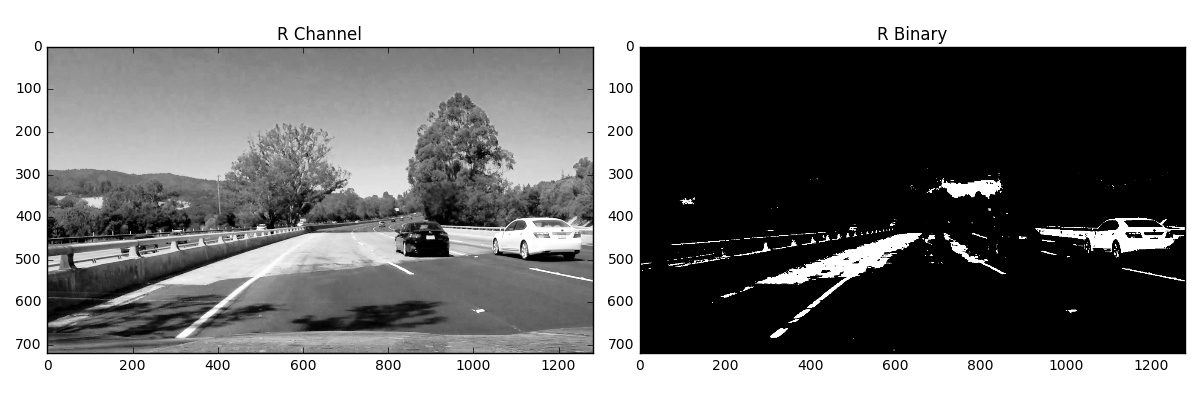

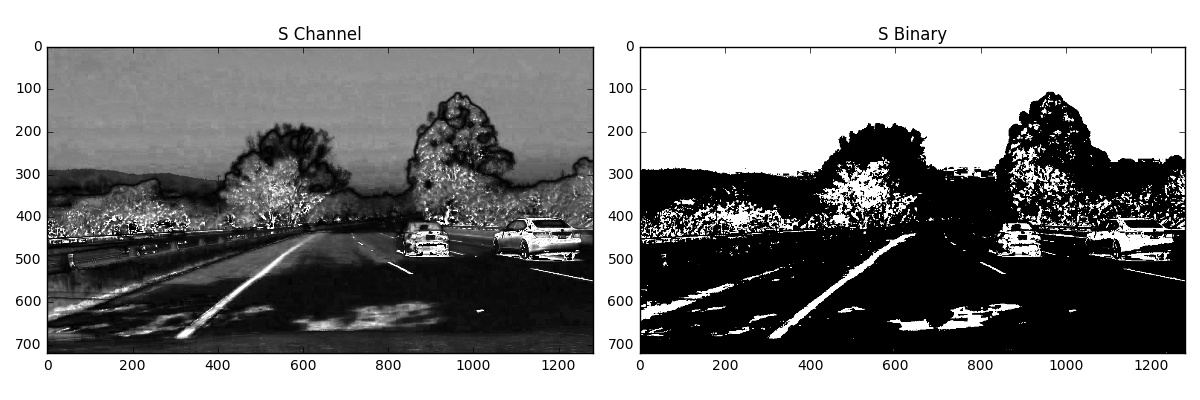

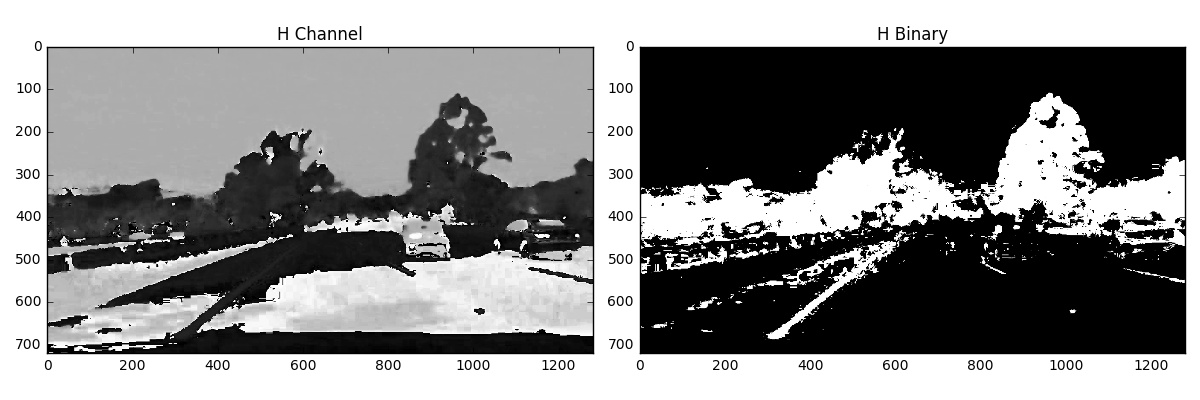

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

### c) HLS Quiz

Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive (`>`) lower bound and an inclusive upper bound (`<=`).